In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, rgba2rgb

(699, 1010)


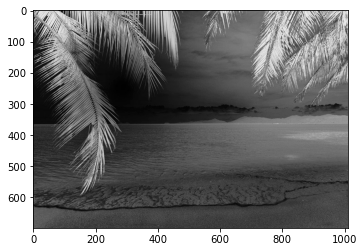

In [15]:
first_image = rgb2gray(mpimg.imread('edge1.png'))
plt.imshow(first_image, cmap='Greys')
print(first_image.shape)

In [16]:
def count_elements(image):
    hist = {}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i, j]] = hist.get(image[i, j], 0) + 1
    return hist

In [17]:
def otsu_threshold(source_image, axis=0):
    max_variance = 0
    threshold = 0
    weighted_sum = 0
    sum_background = 0 
    weight_background = 0
    hist = count_elements(source_image)
    total_pixel = sum(list(hist.values()))
    for key in list(hist.keys()):
        weighted_sum += key * hist[key] 
    for key in sorted(list(hist.keys())):
        weight_background += hist[key]
        if (weight_background == 0): 
            continue
        weight_foreground = total_pixel - weight_background
        if (weight_foreground == 0): 
            break
        sum_background += key * hist[key]
        mean_background = sum_background / weight_background
        mean_foreground = (weighted_sum - sum_background) / weight_foreground
        variance_between = weight_foreground * weight_background * (mean_foreground - mean_background) ** 2
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = key
    if axis == 0:
        img_array = np.where(source_image < threshold, 0, 255) 
    elif axis == 1:
        img_array = np.where(source_image < threshold, 255, 0) 
    return img_array, threshold

In [18]:
def sobel_operator(image, axes, imgname):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    fig, ayarr = plt.subplots(4, 1) 
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ayarr[0].imshow(image, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_grayscale.png', image, cmap='Greys')
    sobel_y = sobel_x.transpose()
    graph_x = np.zeros(image.shape)
    graph_y = np.zeros(image.shape)
    for vert in range(image.shape[0]):
        for horiz in range(image.shape[1]):
            graph_x[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz+3] * sobel_x)
            graph_y[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz+3] * sobel_y)
    graph_x_otsu, threshold_x = otsu_threshold(graph_x, axes[0])
    ayarr[1].imshow(graph_x_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_sobel_x.png', graph_x_otsu, cmap='Greys')
    graph_y_otsu, threshold_y= otsu_threshold(graph_y, axes[1])
    ayarr[2].imshow(graph_y_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_sobel_y.png', graph_y_otsu, cmap='Greys')
    graph = np.hypot(graph_x, graph_y)
    graph_otsu, threshold = otsu_threshold(graph, axes[2])
    ayarr[3].imshow(graph_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_sobel.png', graph_otsu, cmap='Greys')
    return graph_otsu

In [19]:
def prewitt_operator(image, axes, imgname):
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    fig, ayarr = plt.subplots(4, 1) 
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ayarr[0].imshow(image, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_grayscale.png', image, cmap='Greys')
    prewitt_y = prewitt_x.transpose()
    graph_x = np.zeros(image.shape)
    graph_y = np.zeros(image.shape)
    for vert in range(image.shape[0]):
        for horiz in range(image.shape[1]):
            graph_x[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz+3] * prewitt_x)
            graph_y[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz+3] * prewitt_y)
    graph_x_otsu, threshold_x = otsu_threshold(graph_x, axes[0])
    ayarr[1].imshow(graph_x_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_prewitt_x.png', graph_x_otsu, cmap='Greys')
    graph_y_otsu, threshold_y= otsu_threshold(graph_y, axes[1])
    ayarr[2].imshow(graph_y_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_prewitt_y.png', graph_y_otsu, cmap='Greys')
    graph = np.hypot(graph_x, graph_y)
    graph_otsu, threshold = otsu_threshold(graph, axes[2])
    ayarr[3].imshow(graph_otsu, cmap='Greys')
    plt.imsave('./edge_detection/' + imgname + '_prewitt.png', graph_otsu, cmap='Greys')
    return graph_otsu

In [20]:
def canny_edge_detection(image, kernel_size, sigma, t_low, t_high, imgname):
    # Create and Apply Gaussian Filter
    gauss_filter = np.zeros((kernel_size, kernel_size))
    gauss_image = np.zeros(image.shape)
    k = (kernel_size - 1) // 2
    for i in range(1, gauss_filter.shape[0] + 1):
        for j in range(1, gauss_filter.shape[1] + 1):
            gauss_filter[i - 1, j - 1] = np.exp(-((i - k - 1) ** 2 + (j - k - 1) ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 2) 
    gauss_filter = (gauss_filter / gauss_filter[0, 0]).astype(int)
    padded_image = np.pad(image, ((k, k), (k, k)), mode='constant', constant_values=0)
    for vert in range(image.shape[0]):
        for horiz in range(image.shape[1]):
            gauss_image[vert, horiz] = np.sum(padded_image[vert:vert + kernel_size, horiz:horiz + kernel_size] * gauss_filter) / np.sum(gauss_filter)
    
    # Apply Sobel Operator
    padded_image = np.pad(gauss_image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    padded_image = padded_image * 255 / padded_image.max()
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobel_y = sobel_x.transpose()
    graph_x = np.zeros(image.shape)
    graph_y = np.zeros(image.shape)
    for vert in range(image.shape[0]):
        for horiz in range(image.shape[1]):
            graph_x[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz + 3] *  sobel_x)
            graph_y[vert, horiz] = np.sum(padded_image[vert:vert + 3, horiz:horiz + 3] * sobel_y)
    graph = np.sqrt(graph_x ** 2 + graph_y ** 2)
    theta = np.arctan2(graph_y, graph_x)
    
    # Non-Max Suppression
    suppressed_image = np.zeros(image.shape, dtype=np.int32)
    angle = theta * 180.0 / np.pi
    angle[angle < 0] += 180
    for vert in range(1, image.shape[0] - 1):
        for horiz in range(1, image.shape[1] - 1):
            try:
                firstbour = 255
                secondbour = 255
                if (0 <= angle[vert, horiz] and angle[vert, horiz] < 22.5) or (157.5 <= angle[vert, horiz] and angle[vert, horiz] <= 180):
                    firstbour = graph[vert, horiz + 1]
                    secondbour = graph[vert, horiz - 1]
                elif 22.5 <= angle[vert, horiz] and angle[vert, horiz] < 67.5:
                    firstbour = graph[vert + 1, horiz - 1]
                    secondbour = graph[vert - 1, horiz + 1]
                elif 67.5 <= angle[vert, horiz] and angle[vert, horiz] < 112.5:
                    firstbour = graph[vert + 1, horiz]
                    secondbour = graph[vert - 1, horiz]
                elif 112.5 <= angle[vert, horiz] and angle[vert, horiz] < 157.5:
                    firstbour = graph[vert - 1, horiz - 1]
                    secondbour = graph[vert + 1, horiz + 1]
                    
                if graph[vert, horiz] >= firstbour and graph[vert, horiz] >= secondbour:
                    suppressed_image[vert, horiz] = graph[vert, horiz]
                else:
                    suppressed_image[vert, horiz] = 0
            except IndexError as e:
                pass
    
    # Double Threshold
    dthreshold = np.zeros(suppressed_image.shape, dtype=np.int32)  
    weak = np.int32(t_low)
    strong = np.int32(t_high)
    strong_i, strong_j = np.where(suppressed_image >= t_high)
    zeros_i, zeros_j = np.where(suppressed_image < t_low) 
    weak_i, weak_j = np.where((suppressed_image <= t_high) & (suppressed_image >= t_low))    
    dthreshold[strong_i, strong_j] = strong
    dthreshold[weak_i, weak_j] = weak
    
    # Hysteresis
    for vert in range(1, image.shape[0] - 1):
        for horiz in range(1, image.shape[1] - 1):
            if dthreshold[vert, horiz] == weak:
                try:
                    if strong in dthreshold[vert - 1:vert + 1, horiz - 1:horiz + 1] :
                        dthreshold[vert, horiz] = strong
                    else:
                        dthreshold[vert, horiz] = 0
                except IndexError as e:
                    pass
    
    plt.imshow(dthreshold, cmap='gray')
    plt.imsave('./edge_detection/' + imgname + '_canny.png', dthreshold, cmap='gray')
    return dthreshold

In [21]:
def hough_transform(image, kernel_size, sigma, t_low, t_high, imgname):
    edged_image = canny_edge_detection(image, 5, 3, 5, 60, imgname)
    hough_image = np.zeros(edged_image.shape)
    theta_array = np.deg2rad(np.arange(-90, 90, 0.1))
    diag_len = int((image.shape[0] ** 2 + image.shape[1] ** 2) ** (1 / 2))
    rho_array = np.linspace(-diag_len, diag_len, diag_len * 2)
    accumulator = np.zeros((2 * diag_len, len(theta_array)), dtype=np.uint8)
    cos_values = np.cos(theta_array)
    sin_values = np.sin(theta_array)
    y_idxs, x_idxs = np.nonzero(edged_image)
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for theta in range(len(theta_array)):
            rho = diag_len + int(x * cos_values[theta] + y * sin_values[theta])
            accumulator[rho, theta] += 1
    fig, ayarr = plt.subplots(2, 1) 
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ayarr[0].imshow(accumulator, cmap='jet',extent=[np.rad2deg(theta_array[-1]) * 4, np.rad2deg(theta_array[0]) * 4, rho_array[-1], rho_array[0]])
    ayarr[1].imshow(hough_image, cmap='Greys')

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

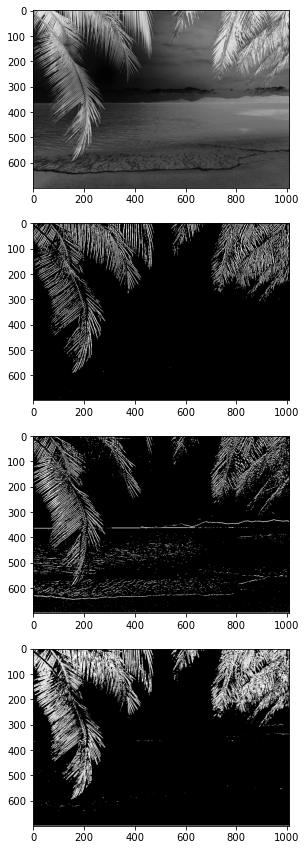

In [22]:
first_image = rgb2gray(mpimg.imread('edge1.png'))
sobel_operator(first_image, [0, 1, 1], 'edge1')

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0,   0]])

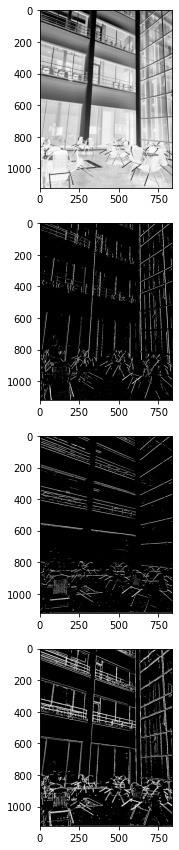

In [23]:
second_image = rgb2gray(rgba2rgb(mpimg.imread('edge2.png')))
sobel_operator(second_image, [1, 1, 1], 'edge2')

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

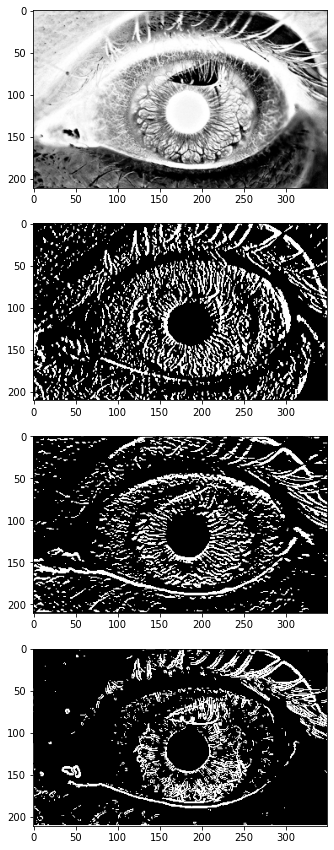

In [24]:
third_image = rgb2gray(mpimg.imread('edge3.png'))
sobel_operator(third_image, [1, 0, 1], 'edge3')

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

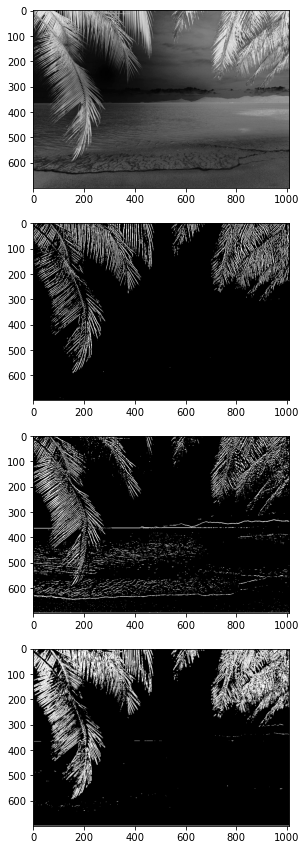

In [25]:
first_image = rgb2gray(mpimg.imread('edge1.png'))
prewitt_operator(first_image, [0, 1, 1], 'edge1')

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ...,   0,   0,   0]])

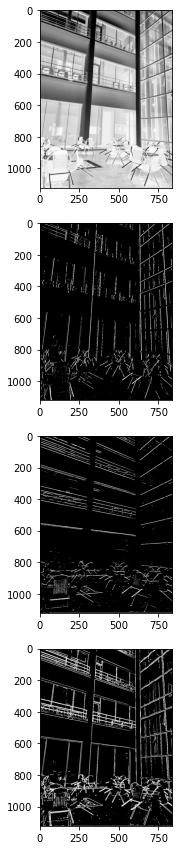

In [26]:
second_image = rgb2gray(rgba2rgb(mpimg.imread('edge2.png')))
prewitt_operator(second_image, [1, 1, 1], 'edge2')

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

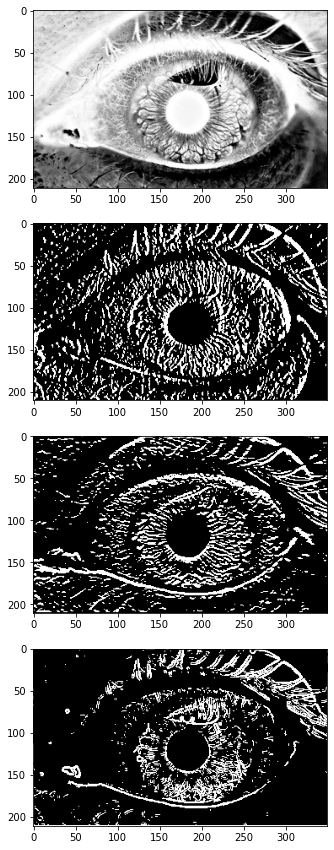

In [27]:
third_image = rgb2gray(mpimg.imread('edge3.png'))
prewitt_operator(third_image, [1, 0, 1], 'edge3')

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 60,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

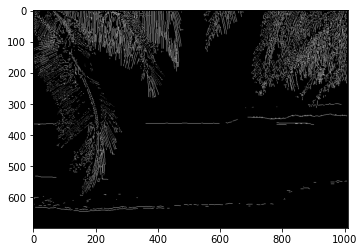

In [28]:
first_image = rgb2gray(mpimg.imread('edge1.png'))
canny_edge_detection(first_image, 5, 3, 5, 60, 'edge1')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

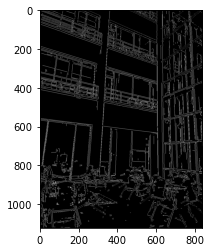

In [29]:
second_image = rgb2gray(rgba2rgb(mpimg.imread('edge2.png')))
canny_edge_detection(second_image, 5, 3, 5, 60, 'edge2')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

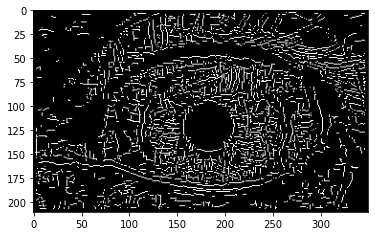

In [30]:
third_image = rgb2gray(mpimg.imread('edge3.png'))
canny_edge_detection(third_image, 5, 3, 5, 60, 'edge3')

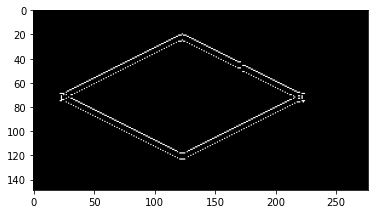

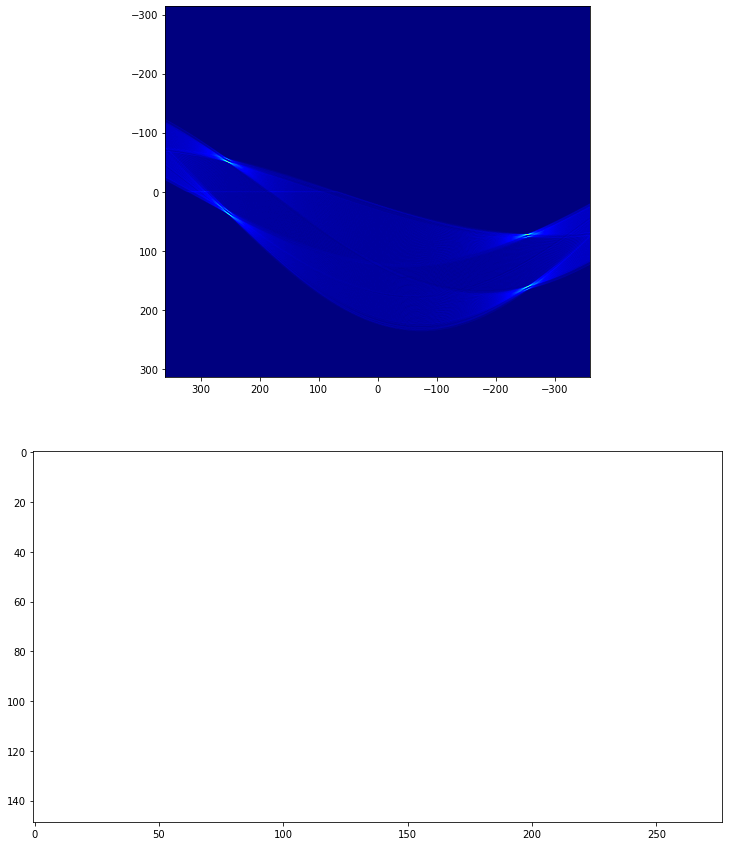

In [31]:
first_image = rgb2gray(mpimg.imread('hough.png'))
hough_transform(first_image, 5, 3, 5, 60, 'hough')